In [34]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv("data/scraped_news_2004_2025.csv")

In [36]:
df.head()

,topic,date,text,headings
0,NaN,"January 1, 2004","edit,history,watch,Montréal/Dorval Internation...",NaN
1,NaN,"January 2, 2004","edit,history,watch,South Asian Association for...",NaN
2,NaN,"January 3, 2004","edit,history,watch,A ,Boeing 737,, ,Flight 604...",NaN
3,NaN,"January 4, 2004","edit,history,watch,The ,Loya jirga, adopts a n...",NaN
4,NaN,"January 5, 2004","edit,history,watch,A British and a German ,Mem...",NaN


In [37]:
df.drop(['headings'], axis=1, inplace=True)

In [38]:
df.dropna(subset=['topic'], axis=0, inplace=True)

In [39]:
df.isna().sum()

topic    0
date     0
text     0
dtype: int64

In [40]:
df

,topic,date,text
1123,Armed conflicts and attacks,"November 3, 2007","edit,history,watch,2007 Pakistani state of eme..."
2097,"Armed conflicts and attacks,Art, culture and e...","June 2, 2010","edit,history,watch,The crew of the ,Libyan, M/..."
2098,"General News,Armed conflicts and attacks,Art, ...","June 3, 2010","edit,history,watch,British Airways, issues an ..."
2099,"Armed conflicts and attacks,Business and econo...","June 4, 2010","edit,history,watch,Gaza flotilla raid,:\n,Anti..."
2100,"Disasters,International relations,Religion,Sports","June 5, 2010","edit,history,watch,A cap is placed on the leak..."
...,...,...,...
7305,"Armed conflicts and attacks,Business and econo...","February 24, 2025","edit,history,watch,War against the Islamic Sta..."
7306,"Armed conflicts and attacks,Business and econo...","February 25, 2025","edit,history,watch,Kivu conflict,\n,M23 campai..."
7307,"Armed conflicts and attacks,Arts and culture,B...","February 26, 2025","edit,history,watch,Somali Civil War,\n,African..."
7308,"Armed conflicts and attacks,Business and econo...","February 27, 2025","edit,history,watch,Israeli–Palestinian conflic..."


In [41]:

    
df['text'] = df['text'].str.replace("^edit,history,watch,", "", regex=True)
df['text'] = df['text'].str.strip()

In [42]:
df

,topic,date,text
1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President..."
2097,"Armed conflicts and attacks,Art, culture and e...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ..."
2098,"General News,Armed conflicts and attacks,Art, ...","June 3, 2010","British Airways, issues an apology for a photo..."
2099,"Armed conflicts and attacks,Business and econo...","June 4, 2010","Gaza flotilla raid,:\n,Anti-Israel protests ta..."
2100,"Disasters,International relations,Religion,Sports","June 5, 2010","A cap is placed on the leaking pipe of the ,De..."
...,...,...,...
7305,"Armed conflicts and attacks,Business and econo...","February 24, 2025","War against the Islamic State,\n,Islamic State..."
7306,"Armed conflicts and attacks,Business and econo...","February 25, 2025","Kivu conflict,\n,M23 campaign,\n,2025 Uvira of..."
7307,"Armed conflicts and attacks,Arts and culture,B...","February 26, 2025","Somali Civil War,\n,African Union Support and ..."
7308,"Armed conflicts and attacks,Business and econo...","February 27, 2025","Israeli–Palestinian conflict,\n,Gaza war,\n,20..."


In [43]:
df['text_cleaned'] = df['text'].str.replace("[^a-zA-Z0-9]", " ", regex=True)

In [44]:
df

,topic,date,text,text_cleaned
1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...
2097,"Armed conflicts and attacks,Art, culture and e...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...
2098,"General News,Armed conflicts and attacks,Art, ...","June 3, 2010","British Airways, issues an apology for a photo...",British Airways issues an apology for a photo...
2099,"Armed conflicts and attacks,Business and econo...","June 4, 2010","Gaza flotilla raid,:\n,Anti-Israel protests ta...",Gaza flotilla raid Anti Israel protests tak...
2100,"Disasters,International relations,Religion,Sports","June 5, 2010","A cap is placed on the leaking pipe of the ,De...",A cap is placed on the leaking pipe of the De...
...,...,...,...,...
7305,"Armed conflicts and attacks,Business and econo...","February 24, 2025","War against the Islamic State,\n,Islamic State...",War against the Islamic State Islamic State ...
7306,"Armed conflicts and attacks,Business and econo...","February 25, 2025","Kivu conflict,\n,M23 campaign,\n,2025 Uvira of...",Kivu conflict M23 campaign 2025 Uvira offe...
7307,"Armed conflicts and attacks,Arts and culture,B...","February 26, 2025","Somali Civil War,\n,African Union Support and ...",Somali Civil War African Union Support and S...
7308,"Armed conflicts and attacks,Business and econo...","February 27, 2025","Israeli–Palestinian conflict,\n,Gaza war,\n,20...",Israeli Palestinian conflict Gaza war 2025...


In [45]:
df['date_cleaned'] = pd.to_datetime(df['date'])

In [46]:
df

,topic,date,text,text_cleaned,date_cleaned
1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...,2007-11-03
2097,"Armed conflicts and attacks,Art, culture and e...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02
2098,"General News,Armed conflicts and attacks,Art, ...","June 3, 2010","British Airways, issues an apology for a photo...",British Airways issues an apology for a photo...,2010-06-03
2099,"Armed conflicts and attacks,Business and econo...","June 4, 2010","Gaza flotilla raid,:\n,Anti-Israel protests ta...",Gaza flotilla raid Anti Israel protests tak...,2010-06-04
2100,"Disasters,International relations,Religion,Sports","June 5, 2010","A cap is placed on the leaking pipe of the ,De...",A cap is placed on the leaking pipe of the De...,2010-06-05
...,...,...,...,...,...
7305,"Armed conflicts and attacks,Business and econo...","February 24, 2025","War against the Islamic State,\n,Islamic State...",War against the Islamic State Islamic State ...,2025-02-24
7306,"Armed conflicts and attacks,Business and econo...","February 25, 2025","Kivu conflict,\n,M23 campaign,\n,2025 Uvira of...",Kivu conflict M23 campaign 2025 Uvira offe...,2025-02-25
7307,"Armed conflicts and attacks,Arts and culture,B...","February 26, 2025","Somali Civil War,\n,African Union Support and ...",Somali Civil War African Union Support and S...,2025-02-26
7308,"Armed conflicts and attacks,Business and econo...","February 27, 2025","Israeli–Palestinian conflict,\n,Gaza war,\n,20...",Israeli Palestinian conflict Gaza war 2025...,2025-02-27


In [47]:
data=df

In [48]:
data

,topic,date,text,text_cleaned,date_cleaned
1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...,2007-11-03
2097,"Armed conflicts and attacks,Art, culture and e...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02
2098,"General News,Armed conflicts and attacks,Art, ...","June 3, 2010","British Airways, issues an apology for a photo...",British Airways issues an apology for a photo...,2010-06-03
2099,"Armed conflicts and attacks,Business and econo...","June 4, 2010","Gaza flotilla raid,:\n,Anti-Israel protests ta...",Gaza flotilla raid Anti Israel protests tak...,2010-06-04
2100,"Disasters,International relations,Religion,Sports","June 5, 2010","A cap is placed on the leaking pipe of the ,De...",A cap is placed on the leaking pipe of the De...,2010-06-05
...,...,...,...,...,...
7305,"Armed conflicts and attacks,Business and econo...","February 24, 2025","War against the Islamic State,\n,Islamic State...",War against the Islamic State Islamic State ...,2025-02-24
7306,"Armed conflicts and attacks,Business and econo...","February 25, 2025","Kivu conflict,\n,M23 campaign,\n,2025 Uvira of...",Kivu conflict M23 campaign 2025 Uvira offe...,2025-02-25
7307,"Armed conflicts and attacks,Arts and culture,B...","February 26, 2025","Somali Civil War,\n,African Union Support and ...",Somali Civil War African Union Support and S...,2025-02-26
7308,"Armed conflicts and attacks,Business and econo...","February 27, 2025","Israeli–Palestinian conflict,\n,Gaza war,\n,20...",Israeli Palestinian conflict Gaza war 2025...,2025-02-27


In [49]:
new_df=data

In [50]:
new_df['topic_cleaned'] = new_df['topic'].str.split(',')

In [51]:
new_df

,topic,date,text,text_cleaned,date_cleaned,topic_cleaned
1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...,2007-11-03,[Armed conflicts and attacks]
2097,"Armed conflicts and attacks,Art, culture and e...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,"[Armed conflicts and attacks, Art, culture an..."
2098,"General News,Armed conflicts and attacks,Art, ...","June 3, 2010","British Airways, issues an apology for a photo...",British Airways issues an apology for a photo...,2010-06-03,"[General News, Armed conflicts and attacks, Ar..."
2099,"Armed conflicts and attacks,Business and econo...","June 4, 2010","Gaza flotilla raid,:\n,Anti-Israel protests ta...",Gaza flotilla raid Anti Israel protests tak...,2010-06-04,"[Armed conflicts and attacks, Business and eco..."
2100,"Disasters,International relations,Religion,Sports","June 5, 2010","A cap is placed on the leaking pipe of the ,De...",A cap is placed on the leaking pipe of the De...,2010-06-05,"[Disasters, International relations, Religion,..."
...,...,...,...,...,...,...
7305,"Armed conflicts and attacks,Business and econo...","February 24, 2025","War against the Islamic State,\n,Islamic State...",War against the Islamic State Islamic State ...,2025-02-24,"[Armed conflicts and attacks, Business and eco..."
7306,"Armed conflicts and attacks,Business and econo...","February 25, 2025","Kivu conflict,\n,M23 campaign,\n,2025 Uvira of...",Kivu conflict M23 campaign 2025 Uvira offe...,2025-02-25,"[Armed conflicts and attacks, Business and eco..."
7307,"Armed conflicts and attacks,Arts and culture,B...","February 26, 2025","Somali Civil War,\n,African Union Support and ...",Somali Civil War African Union Support and S...,2025-02-26,"[Armed conflicts and attacks, Arts and culture..."
7308,"Armed conflicts and attacks,Business and econo...","February 27, 2025","Israeli–Palestinian conflict,\n,Gaza war,\n,20...",Israeli Palestinian conflict Gaza war 2025...,2025-02-27,"[Armed conflicts and attacks, Business and eco..."


In [52]:
exploded_df=new_df.explode("topic_cleaned")

In [53]:
exploded_df['topic_cleaned'] = exploded_df['topic_cleaned'].str.strip()

In [54]:
exploded_df.topic_cleaned.unique()

array(['Armed conflicts and attacks', 'Art', 'culture and entertainment',
       'Disasters', 'International relations', 'Law and crime',
       'Politics and elections', 'Science', 'Sports', 'General News',
       'Business and economy', 'Religion', 'Ecology', 'Current events',
       'News', 'Politics and Elections', 'Arts', 'culture and society',
       'Disasters and accidents', 'Science and technology', 'Sport',
       'Armed conflicts and incidents', 'Arts and culture',
       'Business and economics', 'Politics', 'Entertainment',
       'Current Events', 'Law and politics', 'Arts and entertainment',
       'Science and weather', 'Business', 'Law', 'Other current events',
       'Deepwater Horizon oil spill', 'Science and environment', 'Health',
       'Science & Weather', 'Armed conflicts & attacks',
       'culture & entertainment', 'Business & economics', 'Law & crime',
       'Politics & elections', 'Science & weather',
       'International Relations', 'Economics',
       'A

In [55]:
exploded_df.topic_cleaned = exploded_df.topic_cleaned.str.replace("[^A-Za-z\s]", "", regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4y/8v3hsc192dd3bhhzh6m1dcb40000gn/T/ipykernel_14940/4068160416.py:1: SyntaxWarning: invalid escape sequence '\s'
  exploded_df.topic_cleaned = exploded_df.topic_cleaned.str.replace("[^A-Za-z\s]", "", regex=True)


In [56]:
unique_topics = exploded_df.topic_cleaned.unique()
unique_topics.sort()

In [57]:
unique_topics.sort()

In [58]:
unique_topics

array(['Armed attacks and conflicts', 'Armed conflict and attacks',
       'Armed conflicts  attacks', 'Armed conflicts and attacks',
       'Armed conflicts and incidents', 'Art', 'Art and culture', 'Arts',
       'Arts and Culture', 'Arts and culture', 'Arts and entertainment',
       'Attacks and armed conflicts', 'Business', 'Business  economics',
       'Business and economics', 'Business and economy',
       'Businesses and economy', 'Current Events', 'Current events',
       'Deepwater Horizon oil spill', 'Disaster and accidents',
       'Disasters', 'Disasters and Accidents', 'Disasters and accidents',
       'Disasters and incidents', 'Ecology', 'Economics', 'Entertainment',
       'General News', 'Health', 'Health and environment',
       'Holidays not aligned to the Gregorian Calendar',
       'International Relations', 'International relations', 'Law',
       'Law  crime', 'Law and Crime', 'Law and crime', 'Law and politics',
       'Natural disasters', 'News', 'Other', 'Ot

In [59]:
exploded_df.topic = exploded_df.topic.str.replace("Armed conflicts  attacks", "Armed conflicts and attacks", regex=True) 
exploded_df.topic = exploded_df.topic.str.replace("Armed conflict and attacks", "Armed conflicts and attacks", regex=True) 
exploded_df.topic = exploded_df.topic.str.replace("Art", "Arts and culture", regex=True) 

exploded_df.topic = exploded_df.topic.str.replace("Arts", "Arts and culture", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Art and culture", "Arts and culture", regex=True) 

exploded_df.topic = exploded_df.topic.str.replace("Armed conflicts and incidents", "Armed conflicts and attacks", regex=True)

exploded_df.topic = exploded_df.topic.str.replace("Arts and culture and culture and culture", "Arts and culture", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Arts and culture and cultures", "Arts and culture", regex=True)
exploded_df.topic = exploded_df.topic.str.replace('culture  entertainment', 'culture and entertainment', regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Arts and culture and culture", "Arts and culture", regex=True) 
exploded_df.topic = exploded_df.topic.str.replace("Arts and culture and entertainment", "Arts and culture", regex=True) 
exploded_df.topic = exploded_df.topic.str.replace("Business  economics", "Business and economics", regex=True) 

exploded_df.topic = exploded_df.topic.str.replace('Business', 'Business and economy', regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Business and economy", "Business and economics", regex=True) 
exploded_df.topic = exploded_df.topic.str.replace("Current Events", "Current events", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Disaster and accidents", "Disasters and accidents", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Disasters", "Disasters and accidents", regex=True)

exploded_df.topic = exploded_df.topic.str.replace("Disasters and accidents and accidents", "Disasters and accidents", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Law", "Law", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Law  crime", "Law and crime", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Other", "Other current events", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Politics", "Politics and elections", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Politics  elections", "Politics and elections", regex=True)

exploded_df.topic = exploded_df.topic.str.replace("Science and technology Weather", "Science and technology", regex=True) 
exploded_df.topic = exploded_df.topic.str.replace("Science and technology weather", "Science and technology", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Science and technologyand environment", "Science and technology", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Science and technologyand weather", "Science and technology", regex=True) 

exploded_df.topic = exploded_df.topic.str.replace("Other current events current events", "Other current events", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Politics and elections and Elections", "Politics and elections", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Politics and elections and elections", "Politics and elections", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Politics and elections  elections", "Politics and elections", regex=True) 

exploded_df.topic = exploded_df.topic.str.replace('Law and crime  crime', "Law and crime", regex=True) 

exploded_df.topic = exploded_df.topic.str.replace('Law and crime and crime', 'Law and crime', regex=True) 

exploded_df.topic = exploded_df.topic.str.replace('News', "Other current events", regex=True) 
exploded_df.topic = exploded_df.topic.str.replace('Natural disasters', 'Disasters and accidents', regex=True) 

exploded_df.topic = exploded_df.topic.str.replace('Sport', 'Sports', regex=True) 

exploded_df.topic = exploded_df.topic.str.replace('Sportss', 'Sports', regex=True) 

exploded_df.topic = exploded_df.topic.str.replace('Wrestling Other current events', 'Other current events', regex=True)

exploded_df.topic = exploded_df.topic.str.replace('General Other current events', 'Other current events', regex=True)

exploded_df.topic = exploded_df.topic.str.replace('International Relations', 'International relations', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Current events', 'Other current events', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Law', 'Law and crime', regex=True) 
exploded_df.topic = exploded_df.topic.str.replace('Religion', 'Religion and politics', regex=True) 
exploded_df.topic = exploded_df.topic.str.replace('culture and society', 'Arts and culture', regex=True) 
exploded_df.topic = exploded_df.topic.str.replace('culture and entertainment', 'Arts and culture', regex=True)

exploded_df.topic = exploded_df.topic.str.replace('Technological development', 'Science and technology', regex=True)

exploded_df.topic = exploded_df.topic.str.replace('Business and economics and economics', 'Business and economics', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Business and economics and economy', 'Business and economics', regex=True)

exploded_df.topic = exploded_df.topic.str.replace('Deepwater Horizon oil spill', 'Other current events', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Holidays not aligned to the Gregorian Calendar','Other current events', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Religion and politics and politics', 'Religion and politics', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Law and crime and crime', 'Law and crime', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Health', "Health and environment", regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Law and crime', 'Law and crime and politics', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Law and crime and politics and politics', 'Law and crime and politics', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Politics and elections', 'Politics and elections and economics', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Politics and elections and economics and economics', 'Politics and elections and economics', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Health and environment and environment', 'Health and environment', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Video games', 'Entertainment', regex=True)
exploded_df.topic = exploded_df.topic.str.replace('Ecology', 'Science and technology', regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Economics", "Business and economics", regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Royalty", 'Other current events', regex=True)
exploded_df.topic = exploded_df.topic.str.replace("Pop Culture", "Arts and culture", regex=True)


In [60]:
exploded_df

,topic,date,text,text_cleaned,date_cleaned,topic_cleaned
1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...,2007-11-03,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Art
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,culture and entertainment
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Disasters
...,...,...,...,...,...,...
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Health and environment
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,International relations
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Law and crime
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Politics and elections


In [61]:
exploded_df.topic_cleaned.unique()

array(['Armed conflicts and attacks', 'Art', 'culture and entertainment',
       'Disasters', 'International relations', 'Law and crime',
       'Politics and elections', 'Science', 'Sports', 'General News',
       'Business and economy', 'Religion', 'Ecology', 'Current events',
       'News', 'Politics and Elections', 'Arts', 'culture and society',
       'Disasters and accidents', 'Science and technology', 'Sport',
       'Armed conflicts and incidents', 'Arts and culture',
       'Business and economics', 'Politics', 'Entertainment',
       'Current Events', 'Law and politics', 'Arts and entertainment',
       'Science and weather', 'Business', 'Law', 'Other current events',
       'Deepwater Horizon oil spill', 'Science and environment', 'Health',
       'Science  Weather', 'Armed conflicts  attacks',
       'culture  entertainment', 'Business  economics', 'Law  crime',
       'Politics  elections', 'Science  weather',
       'International Relations', 'Economics',
       'Armed co

In [62]:
exploded_df

,topic,date,text,text_cleaned,date_cleaned,topic_cleaned
1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...,2007-11-03,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Art
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,culture and entertainment
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Disasters
...,...,...,...,...,...,...
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Health and environment
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,International relations
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Law and crime
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Politics and elections


In [65]:
exploded_df['topic_split'] = exploded_df['topic'].str.split(",")

In [66]:
new_df=exploded_df.explode("topic_split")

In [67]:
new_df

,topic,date,text,text_cleaned,date_cleaned,topic_cleaned,topic_split
1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...,2007-11-03,Armed conflicts and attacks,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,Arts and culture
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,Arts and culture
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,Disasters and accidents
...,...,...,...,...,...,...,...
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,Health and environment
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,International relations
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,Law and crime and politics
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,Politics and elections and economics


In [68]:
new_df.topic_split.unique()

array(['Armed conflicts and attacks', 'Arts and culture',
       ' Arts and culture', 'Disasters and accidents',
       'International relations', 'Law and crime and politics',
       'Politics and elections and economics', 'Science', 'Sports',
       'Other current events', 'Business and economics',
       'Religion and politics', 'Science and technology', 'Entertainment',
       'Science and weather', 'Science and environment',
       'Health and environment', 'Science & Weather',
       'Armed conflicts & attacks', ' culture & entertainment',
       'Business and economics & economics',
       'Law and crime and politics & crime',
       'Politics and elections and economics & elections',
       'Science & weather', 'Business and economicses and economy',
       'Armed attacks and conflicts', 'Science and Technology',
       ' Business and economics', ' Law and crime and politics',
       ' Politics and elections and economics ',
       ' Politics and elections and economics',
     

In [ ]:
new_df.groupby(['text_cleaned'].)

In [1361]:
new_df

,topic,text_cleaned,date_cleaned,topic_split,topic_encoded
1123,Armed conflicts and attacks,2007 Pakistani state of emergency President ...,2007-11-03,armed conflicts and attacks,0
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,armed conflicts and attacks,0
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,arts and culture,1
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,arts and culture,1
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,disasters and accidents,2
...,...,...,...,...,...
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,health and environment,12
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,international relations,3
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,law and crime and politics,4
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,politics and elections and economics,5


In [1039]:
len(new_df.topic_split.unique())

14

In [69]:
exploded_df['topic'] = exploded_df['topic'].str.strip()

exploded_df['topic'] = exploded_df.topic.str.replace(' culture & entertainment', 'Arts and culture', regex=True)

exploded_df['topic'] = exploded_df.topic.str.replace('Armed conflicts & attacks', 'Armed conflicts and attacks', regex=True)
exploded_df['topic'] = exploded_df.topic.str.replace('Business and economics & economics', 'Business and economics', regex=True)
exploded_df['topic'] = exploded_df.topic.str.replace('Law and crime and politics', 'Law and crime and politics', regex=True)
  #Politics and elections and economics 
  
exploded_df['topic'] = exploded_df.topic.str.replace('Law and crime and politics & crime', 'Law and crime and politics', regex=True)
exploded_df['topic'] = exploded_df.topic.str.replace('Science and technology& weather', 'Science and technology', regex=True)

In [70]:
new_df.topic_split = new_df.topic_split.str.strip()
new_df.topic_split = new_df.topic_split.str.replace("Politics and elections and economics & elections", "Politics and elections and economics", regex=True)
new_df.topic_split = new_df.topic_split.str.replace('Science and technology& weather', 'Science and technology', regex=True) 
new_df.topic_split = new_df.topic_split.str.replace('Science and technology& Weather', 'Science and technology', regex=True) 
new_df.topic_split = new_df.topic_split.str.replace('Armed conflicts & attacks', 'Armed conflicts and attacks', regex=True) 
new_df.topic_split = new_df.topic_split.str.replace("culture & entertainment", 'Culture and entertainment', regex=True)
new_df.topic_split = new_df.topic_split.str.replace("Law and crime and politics & crime", 'Law and crime and politics', regex=True) 
new_df.topic_split = new_df.topic_split.str.replace('Business and economics & economics', 'Business and economics', regex=True)

In [115]:
new_df

,topic,date,text,text_cleaned,date_cleaned,topic_cleaned,topic_split
1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...,2007-11-03,Armed conflicts and attacks,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,Arts and culture
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,Arts and culture
2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,Disasters and accidents
...,...,...,...,...,...,...,...
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,Health and environment
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,International relations
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,Law and crime and politics
7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,Politics and elections and economics


In [116]:
new_df.topic_split.unique()

array(['Armed conflicts and attacks', 'Arts and culture',
       'Disasters and accidents', 'International relations',
       'Law and crime and politics',
       'Politics and elections and economics', 'Science', 'Sports',
       'Other current events', 'Business and economics',
       'Religion and politics', 'Science and technology', 'Entertainment',
       'Science and weather', 'Science and environment',
       'Health and environment', 'Science & Weather',
       'Culture and entertainment', 'Science & weather',
       'Business and economicses and economy',
       'Armed attacks and conflicts', 'Science and Technology',
       'Disasters and accidents and incidents',
       'Law and crime and politics and Crime',
       'Disasters and accidents and Accidents',
       'Arts and culture and Culture', 'Attacks and armed conflicts'],
      dtype=object)

In [142]:
new_df.topic_split = new_df.topic_split.str.replace("Science", "Science and technology", regex=True) 
new_df.topic_split = new_df.topic_split.str.replace("Disasters and accidents and incidents", "Disasters and accidents", regex=True) 
new_df.topic_split = new_df.topic_split.str.replace("Attacks and armed conflicts", "Armed conflicts and attacks", regex=True) 
new_df.topic_split = new_df.topic_split.str.replace("Science & weather", "Science and technology", regex=True) 
new_df.topic_split = new_df.topic_split.str.replace("Science and weather", "Science and technology", regex=True) 
new_df.topic_split = new_df.topic_split.str.replace('Science and technology & weather', 'Science and technology', regex=True) 
new_df.topic_split = new_df.topic_split.str.replace("Science and technology & Weather", 'Science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('Science and technology and technology and weather', 'Science and technology', regex=True) 
new_df.topic_split = new_df.topic_split.str.replace("Science and technology and technology and environment", "Science and technology", regex=True) 
new_df.topic_split = new_df.topic_split.str.replace('Arts and culture and Culture', 'Arts and culture', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('Science and technology and technology and technology and weather', 'Science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('Science and technology and technology and technology and environment', 'Science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('Science and technology and technology and technology and technology', 'Science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('Disasters and accidents and Accidents', 'Disasters and accidents', regex=True) 
new_df.topic_split = new_df.topic_split.str.replace('Science and technology and technology and Technology', 'Science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('Science and technology and technology and technology and Technology', 'Science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('Science and technology and technology and technology & weather', 'Science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('Science and technology and technology', 'Science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace("science and technology and technology", 'science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('science and technology & weather', 'science and technology', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('business and economicses and economy', 'business and economics', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('armed attacks and conflicts', 'armed conflicts and attacks', regex=True)
new_df.topic_split = new_df.topic_split.str.replace('law and crime and politics and crime', 'law and crime and politics', regex=True)

In [139]:
new_df.topic_split = new_df.topic_split.str.lower()

In [143]:
new_df.topic_split.unique()

array(['armed conflicts and attacks', 'arts and culture',
       'disasters and accidents', 'international relations',
       'law and crime and politics',
       'politics and elections and economics', 'science and technology',
       'sports', 'other current events', 'business and economics',
       'religion and politics', 'entertainment', 'health and environment',
       'culture and entertainment'], dtype=object)

In [145]:
!ls

README.md              arvix_data             extracted_topics.csv
__pycache__            classify_news.ipynb    fake_news.ipynb
ai_detection.py        classify_news.py       news_scraper
ai_detector.pkl        clean_df.csv           requirements.txt
ai_vectoriser.pkl      data
app.py                 explain_ai_detector.py


In [146]:
new_df.to_csv("cleaned_df.csv")

In [144]:
len(new_df.topic_split.unique())

14

--------------

# Preprocessing

In [1248]:
new_df_aggregated['topic_split_aggregated_split'] = new_df_aggregated['topic_split_aggregated'].str.split(",")
new_df_aggregated['topic_split_aggregated_split'] = [str(i) for i in new_df_aggregated['topic_split_aggregated_split']]

In [1262]:
new_df

,topic,text_cleaned,date_cleaned,topic_split
1123,Armed conflicts and attacks,2007 Pakistani state of emergency President ...,2007-11-03,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Arts and culture
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Arts and culture
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Disasters and accidents
...,...,...,...,...
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Health and environment
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,International relations
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Law and crime and politics
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Politics and elections and economics


In [1267]:
new_df['topic_split'] = new_df.topic_split.str.lower()

In [ ]:
new_df['topic_encoded'] = [topic_hashmap[topic] for topic in new_df['topic_split']]

new_df

,topic,text_cleaned,date_cleaned,topic_split,topic_encoded
1123,Armed conflicts and attacks,2007 Pakistani state of emergency President ...,2007-11-03,armed conflicts and attacks,0
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,armed conflicts and attacks,0
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,arts and culture,1
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,arts and culture,1
2097,"Armed conflicts and attacks,Arts and culture, ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,disasters and accidents,2
...,...,...,...,...,...
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,health and environment,12
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,international relations,3
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,law and crime and politics,4
7309,"Armed conflicts and attacks,Business and econo...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,politics and elections and economics,5


In [212]:
len(new_df.topic_split.unique())

14

In [213]:
joblib.dump(new_df, 'data/new_df.pkl')

['data/new_df.pkl']

In [1284]:
# imploding the topic_encoded

new_df_grouped = new_df.groupby(['text_cleaned']).agg(topic_encoded_joined=(str("topic_encoded"), ','.join))
new_df_grouped['topic_encoded_joined'] = new_df_grouped['topic_encoded_joined'].str.split(',')
new_df_grouped = new_df_grouped.reset_index()
new_df_grouped

,text_cleaned,topic_encoded_joined
0,1 person is killed and at least 10 are injured...,"[0, 2, 9, 5, 7, 0, 2, 9, 5, 7, 0, 2, 9, 5, 7, ..."
1,15 000 villagers are to be displaced in easter...,"[0, 1, 9, 2, 3, 4, 5, 6, 7, 0, 1, 9, 2, 3, 4, ..."
2,2007 Pakistani state of emergency President ...,[0]
3,2018 2023 Haitian crisis Canada Haiti relati...,"[0, 9, 2, 12, 4, 5, 7, 0, 9, 2, 12, 4, 5, 7, 0..."
4,2018 Gaza border protests The Israel Defens...,"[0, 2, 3, 4, 6, 0, 2, 3, 4, 6, 0, 2, 3, 4, 6, ..."
...,...,...
1689,Yemeni Civil War Six people are killed and s...,"[0, 9, 2, 12, 3, 4, 5, 7, 0, 9, 2, 12, 3, 4, 5..."
1690,Yemeni Civil War Three Yemeni soldiers are...,"[0, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5, 6, 0, 2, 3, ..."
1691,Yemeni Civil War Two missiles are launched...,"[0, 2, 12, 3, 4, 5, 0, 2, 12, 3, 4, 5, 0, 2, 1..."
1692,Yemeni Civil War UNICEF says that 10 000 ch...,"[0, 12, 3, 4, 0, 12, 3, 4, 0, 12, 3, 4, 0, 12,..."


In [220]:

new_df_grouped = new_df.groupby(['text_cleaned']).agg(topic_encoded_joined=(str("topic_split"), ','.join))
new_df_grouped['topic_encoded_joined'] = new_df_grouped['topic_encoded_joined'].str.split(',')
new_df_grouped = new_df_grouped.reset_index()
new_df_grouped

,text_cleaned,topic_encoded_joined
0,1 person is killed and at least 10 are injured...,"[armed conflicts and attacks, disasters and ac..."
1,15 000 villagers are to be displaced in easter...,"[armed conflicts and attacks, arts and culture..."
2,2007 Pakistani state of emergency President ...,[armed conflicts and attacks]
3,2018 2023 Haitian crisis Canada Haiti relati...,"[armed conflicts and attacks, business and eco..."
4,2018 Gaza border protests The Israel Defens...,"[armed conflicts and attacks, disasters and ac..."
...,...,...
1689,Yemeni Civil War Six people are killed and s...,"[armed conflicts and attacks, business and eco..."
1690,Yemeni Civil War Three Yemeni soldiers are...,"[armed conflicts and attacks, disasters and ac..."
1691,Yemeni Civil War Two missiles are launched...,"[armed conflicts and attacks, disasters and ac..."
1692,Yemeni Civil War UNICEF says that 10 000 ch...,"[armed conflicts and attacks, health and envir..."


In [222]:
y = mlb.fit_transform(new_df_grouped['topic_encoded_joined'])
joblib.dump(y, 'data/y.pkl')

['data/y.pkl']

In [166]:
b

,date,text_cleaned,topic_split_encoded_joined
0,"April 1, 2021",War in Afghanistan 2001 2021 2021 Afghanis...,"0,1,9,12,3,4,5,0,1,9,12,3,4,5,0,1,9,12,3,4,5,0..."
1,"April 1, 2022",Russo Ukrainian War 2022 Russian invasion of...,"0,2,12,3,4,5,0,2,12,3,4,5,0,2,12,3,4,5,0,2,12,..."
2,"April 1, 2023",In India a new income tax law comes into ...,"9,2,3,6,9,2,3,6,9,2,3,6,9,2,3,6"
3,"April 1, 2024",Israel Hamas war World Central Kitchen drone...,"0,2,3,4,5,0,2,3,4,5,0,2,3,4,5,0,2,3,4,5,0,2,3,4,5"
4,"April 1, 2025",Middle Eastern crisis Gaza war Israeli inv...,"0,2,3,5,6,0,2,3,5,6,0,2,3,5,6,0,2,3,5,6,0,2,3,5,6"
...,...,...,...
1689,"September 9, 2021",Afghanistan conflict 2021 evacuation from Af...,"0,1,9,2,12,3,5,0,1,9,2,12,3,5,0,1,9,2,12,3,5,0..."
1690,"September 9, 2022",Russo Ukrainian War 2022 Russian invasion of...,"0,2,5,6,0,2,5,6,0,2,5,6,0,2,5,6"
1691,"September 9, 2023",Russian invasion of Ukraine Zaporizhzhia Nuc...,"0,1,4,5,7,0,1,4,5,7,0,1,4,5,7,0,1,4,5,7,0,1,4,5,7"
1692,"September 9, 2024",Russian invasion of Ukraine Eastern Ukraine ...,"0,9,2,3,4,0,9,2,3,4,0,9,2,3,4,0,9,2,3,4,0,9,2,3,4"


In [ ]:
b.topic_split_encoded_joined = b.topic_split_encoded_joined.str.split(",")

In [ ]:
b.topic_s

,date,text_cleaned,topic_split_encoded_joined
0,"April 1, 2021",War in Afghanistan 2001 2021 2021 Afghanis...,"0,1,9,12,3,4,5,0,1,9,12,3,4,5,0,1,9,12,3,4,5,0..."
1,"April 1, 2022",Russo Ukrainian War 2022 Russian invasion of...,"0,2,12,3,4,5,0,2,12,3,4,5,0,2,12,3,4,5,0,2,12,..."
2,"April 1, 2023",In India a new income tax law comes into ...,"9,2,3,6,9,2,3,6,9,2,3,6,9,2,3,6"
3,"April 1, 2024",Israel Hamas war World Central Kitchen drone...,"0,2,3,4,5,0,2,3,4,5,0,2,3,4,5,0,2,3,4,5,0,2,3,4,5"
4,"April 1, 2025",Middle Eastern crisis Gaza war Israeli inv...,"0,2,3,5,6,0,2,3,5,6,0,2,3,5,6,0,2,3,5,6,0,2,3,5,6"


In [214]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
import nltk
from nltk.corpus import stopwords

mlb = MultiLabelBinarizer()

y = mlb.fit_transform(b['topic_split_encoded_joined'])
y

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0]], shape=(1694, 11))

In [216]:
test_y = pd.get_dummies(new_df.topic_split)

In [217]:
test_y

,armed conflicts and attacks,arts and culture,business and economics,culture and entertainment,disasters and accidents,entertainment,health and environment,international relations,law and crime and politics,other current events,politics and elections and economics,religion and politics,science and technology,sports
1123,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2097,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2097,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2097,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2097,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7309,False,False,False,False,False,False,True,False,False,False,False,False,False,False
7309,False,False,False,False,False,False,False,True,False,False,False,False,False,False
7309,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7309,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [218]:
X_train, X_test, Y_train, Y_test = train_test_split(X, test_y, test_size=0.2) 
clf = sklearn.tree.DecisionTreeClassifier() 
X_train_tfidf, X_test_tfidf = vectoriser.transform(X_train), vectoriser.transform(X_test) 
clf.fit(X_train_tfidf, Y_train) 



ValueError: Found input variables with inconsistent numbers of samples: [1694, 58588]

In [168]:
y

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0]], shape=(1694, 11))

In [169]:
joblib.dump(y, 'data/y.pkl')

['data/y.pkl']

In [170]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thomasnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1287]:
y

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], shape=(1694, 14))

In [209]:
y

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0]], shape=(1694, 11))

In [172]:
X = b.drop(['date', 'topic_split_encoded_joined'], axis=1)

In [173]:
joblib.dump(X, 'data/X.pkl')

['data/X.pkl']

In [174]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2) 

In [175]:
X_train

,text_cleaned
820,Russian invasion of Ukraine Foreign involvem...
156,Gaza war Israeli invasion of the Gaza Strip ...
555,Insurgency in Balochistan Sistan and Baluche...
46,Russo Ukrainian War 2022 Russian invasion of...
1355,Somali Civil War November 2021 Mogadishu bom...
...,...
1661,Papua conflict Five Free Papua Movement mi...
114,Russo Ukrainian War 2022 Russian invasion of...
1262,Russo Ukrainian War 2022 Russian invasion of...
1098,Nagorno Karabakh conflict Three Armenian p...


In [1296]:
Y_train
np.unique(Y_train)

array([0, 1])

In [177]:
Y_test

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 0]], shape=(339, 11))

In [178]:
stop_words = set(stopwords.words('english'))

In [179]:
vectoriser = TfidfVectorizer(stop_words=list(stop_words), lowercase=True)

In [180]:
X_train_tfidf = vectoriser.fit_transform(X_train.text_cleaned)

In [181]:
y

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0]], shape=(1694, 11))

In [182]:
X_test_tfidf = vectoriser.transform(X_test.text_cleaned)

In [183]:
X_train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 377768 stored elements and shape (1355, 32023)>

In [186]:
model = XGBClassifier(max_depth=50, eta=0.1, gamma=0, scale_pos_weight=100)

In [202]:
model2 = XGBClassifier(max_depth=50, eta=0.001, gamma=0)

In [187]:
model.fit(X_train_tfidf, Y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [203]:
model2.fit(X_train_tfidf, Y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [188]:
predictions = model.predict(X_test_tfidf)

In [206]:
predictions2 = model2.predict(X_test_tfidf)

In [189]:
predict_proba = model.predict_proba(X_test_tfidf)
predict_proba

array([[9.9997425e-01, 9.9979705e-01, 2.2987595e-02, ..., 9.4991767e-01,
        1.1426313e-03, 8.4750496e-02],
       [9.9998724e-01, 9.9994600e-01, 9.9997902e-01, ..., 9.9984694e-01,
        2.3715883e-03, 7.7569032e-01],
       [9.9998319e-01, 9.9992728e-01, 9.9766892e-01, ..., 9.1282523e-01,
        1.0322635e-03, 9.5973855e-01],
       ...,
       [9.9995553e-01, 9.9998271e-01, 8.1442237e-01, ..., 8.4687924e-01,
        4.3039356e-04, 9.6973914e-01],
       [9.9998808e-01, 9.9996316e-01, 9.9997926e-01, ..., 8.5889751e-01,
        5.3466152e-04, 9.9843043e-01],
       [9.9998319e-01, 9.9995100e-01, 9.9998021e-01, ..., 9.9981934e-01,
        9.7065879e-04, 6.0741341e-01]], shape=(339, 11), dtype=float32)

# metrics

In [196]:
joblib.dump(vectoriser, 'data/tfidf_vectoriser.pkl')
joblib.dump(model, 'data/news_model.pkl')

['data/news_model.pkl']

In [193]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [194]:
def calculate_metrics(Y_test, pred): 
    print (f"accuracy: {accuracy_score(Y_test, pred)}")
    print (f"Weighted f1 score: {f1_score(Y_test, pred, average='weighted')}")
    print (f"weighted precision: {precision_score(Y_test, pred, average='weighted')}")
    print (f"weighted recall: {recall_score(Y_test, pred, average='weighted')}")
    print ("------------")
    print (f"macro f1: {f1_score(Y_test, pred, average='macro')}")
    print (f"macro precision: {f1_score(Y_test, pred, average='macro')}")
    print (f"macro recall score: {recall_score(Y_test, pred, average='macro')}")

In [208]:
Y_test

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 0]], shape=(339, 11))

In [195]:
calculate_metrics(Y_test, predictions)

accuracy: 0.12684365781710916
Weighted f1 score: 0.881191164630343
weighted precision: 0.8329224816412424
weighted recall: 0.9407308377896613
------------
macro f1: 0.7637243014164325
macro precision: 0.7637243014164325
macro recall score: 0.8256863749541853


/opt/miniconda3/envs/news_project/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [207]:
# model2
calculate_metrics(Y_test, predictions2)

accuracy: 0.0
Weighted f1 score: 0.8372617485542778
weighted precision: 0.7531325751003002
weighted recall: 1.0
------------
macro f1: 0.6997008946753019
macro precision: 0.6997008946753019
macro recall score: 1.0


In [1316]:
# confusion matrix 

In [1343]:
joblib.dump(model, 'updated_news_model.pkl')

['updated_news_model.pkl']

In [1341]:
a = dict(zip(topic_hashmap.values(), topic_hashmap.keys()))

In [1342]:
a

{0: 'armed conflicts and attacks',
 1: 'arts and culture',
 2: 'disasters and accidents',
 3: 'international relations',
 4: 'law and crime and politics',
 5: 'politics and elections and economics',
 6: 'science and technology',
 7: 'sports',
 8: 'other current events',
 9: 'business and economics',
 10: 'religion and politics',
 11: 'entertainment',
 12: 'health and environment',
 13: 'culture and entertainment'}

In [1350]:
joblib.dump(model, 'data/news_classifier.pkl')

['data/news_classifier.pkl']

In [1377]:
import shap

In [1378]:
X_test

,text_cleaned
1533,Tigray War Dedebit airstrike At least 56 p...
1214,Russo Ukrainian War 2022 Russian invasion of...
882,Myanmar civil war The Tatmadaw carries out...
1,15 000 villagers are to be displaced in easter...
39,2021 Jerusalem shooting A Hamas gunman op...
...,...
340,Gaza War Gaza war hostage crisis 2025 Gaza...
1420,Somali Civil War American military intervent...
967,Russian invasion of Ukraine Attacks in Russi...
95,2023 Atlantic hurricane season Hurricane Lee...


In [7]:
# explaining
import joblib 
model = joblib.load("data/news_model.pkl")
vectoriser=joblib.load("data/tfidf_vectoriser.pkl") 

In [22]:
X_test_tfidf = joblib.load("data/X_test_tfidf.pkl")

In [8]:
import shap

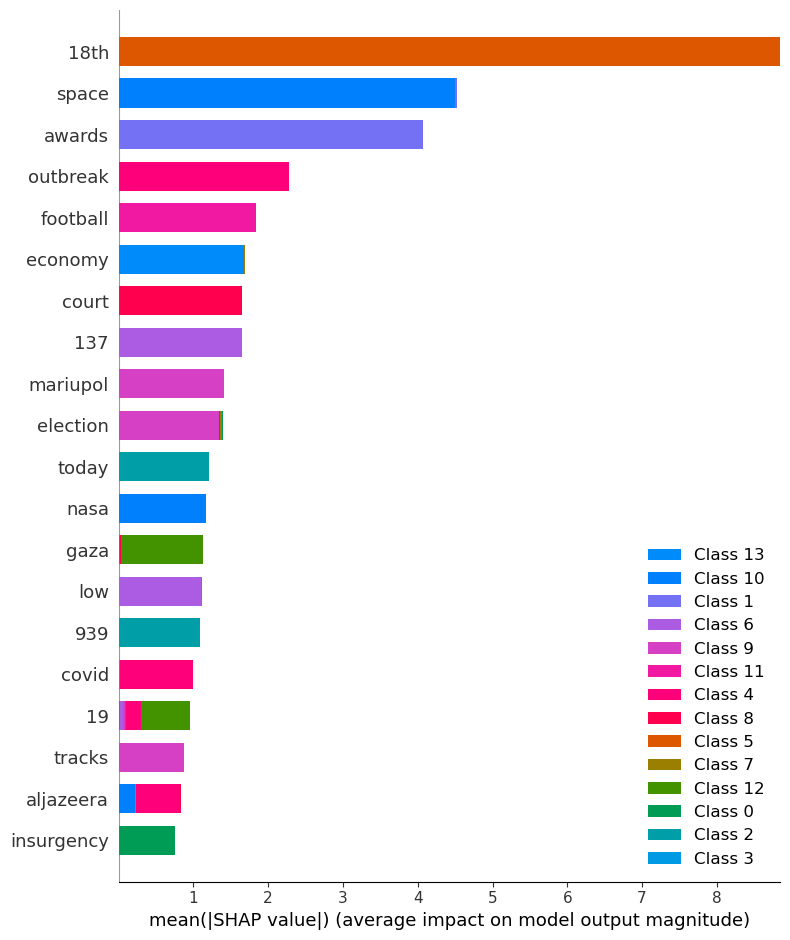

In [89]:
shap.summary_plot(shap_values)

In [80]:
importance = model.feature_importances_
feature_names = vectoriser.get_feature_names_out()

In [79]:
feature_names

<bound method CountVectorizer.get_feature_names_out of TfidfVectorizer(stop_words=['hers', 'if', 'from', 'ourselves', 'both', 'only',
                            'by', 'which', 'or', 'other', 'isn', 'into', 'been',
                            "hadn't", "couldn't", "she'd", 'further', "he'll",
                            'll', 'most', 'don', "isn't", 'do', "you're",
                            'once', 'own', 'have', "wasn't", 'now', 'over', ...])>

In [152]:
a = pd.read_csv("data/cleaned_df.csv")

In [153]:
a

,Unnamed: 0,topic,date,text,text_cleaned,date_cleaned,topic_cleaned,topic_split
0,1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...,2007-11-03,Armed conflicts and attacks,armed conflicts and attacks
1,2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,armed conflicts and attacks
2,2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,arts and culture
3,2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,arts and culture
4,2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,disasters and accidents
...,...,...,...,...,...,...,...,...
58583,7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,health and environment
58584,7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,international relations
58585,7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,law and crime and politics
58586,7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,politics and elections and economics


In [154]:
a.topic_split.unique()

array(['armed conflicts and attacks', 'arts and culture',
       'disasters and accidents', 'international relations',
       'law and crime and politics',
       'politics and elections and economics', 'science and technology',
       'sports', 'other current events', 'business and economics',
       'religion and politics', 'entertainment', 'health and environment',
       'culture and entertainment'], dtype=object)

In [155]:
topic_hashmap = joblib.load("data/topic_hashmap.pkl")

In [156]:
a['topic_split_encoded'] = [topic_hashmap[i] for i in a['topic_split']]
a

,Unnamed: 0,topic,date,text,text_cleaned,date_cleaned,topic_cleaned,topic_split,topic_split_encoded
0,1123,Armed conflicts and attacks,"November 3, 2007","2007 Pakistani state of emergency,\n,President...",2007 Pakistani state of emergency President ...,2007-11-03,Armed conflicts and attacks,armed conflicts and attacks,0
1,2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,armed conflicts and attacks,0
2,2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,arts and culture,1
3,2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,arts and culture,1
4,2097,"Armed conflicts and attacks,Arts and culture, ...","June 2, 2010","The crew of the ,Libyan, M/V ,Rim, takes back ...",The crew of the Libyan M V Rim takes back ...,2010-06-02,Armed conflicts and attacks,disasters and accidents,2
...,...,...,...,...,...,...,...,...,...
58583,7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,health and environment,12
58584,7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,international relations,3
58585,7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,law and crime and politics,4
58586,7309,"Attacks and armed conflicts,Business and econo...","February 28, 2025","2025 Darul Uloom Haqqania bombing,\n,Five peop...",2025 Darul Uloom Haqqania bombing Five peopl...,2025-02-28,Science and technology,politics and elections and economics,5


In [163]:
a.topic_split_encoded = [str(i) for i in a.topic_split_encoded]
b = a.groupby(['date', 'text_cleaned']).agg(topic_split_encoded_joined=(str('topic_split_encoded'), ','.join))

In [165]:
b = b.reset_index()
b

,date,text_cleaned,topic_split_encoded_joined
0,"April 1, 2021",War in Afghanistan 2001 2021 2021 Afghanis...,"0,1,9,12,3,4,5,0,1,9,12,3,4,5,0,1,9,12,3,4,5,0..."
1,"April 1, 2022",Russo Ukrainian War 2022 Russian invasion of...,"0,2,12,3,4,5,0,2,12,3,4,5,0,2,12,3,4,5,0,2,12,..."
2,"April 1, 2023",In India a new income tax law comes into ...,"9,2,3,6,9,2,3,6,9,2,3,6,9,2,3,6"
3,"April 1, 2024",Israel Hamas war World Central Kitchen drone...,"0,2,3,4,5,0,2,3,4,5,0,2,3,4,5,0,2,3,4,5,0,2,3,4,5"
4,"April 1, 2025",Middle Eastern crisis Gaza war Israeli inv...,"0,2,3,5,6,0,2,3,5,6,0,2,3,5,6,0,2,3,5,6,0,2,3,5,6"
...,...,...,...
1689,"September 9, 2021",Afghanistan conflict 2021 evacuation from Af...,"0,1,9,2,12,3,5,0,1,9,2,12,3,5,0,1,9,2,12,3,5,0..."
1690,"September 9, 2022",Russo Ukrainian War 2022 Russian invasion of...,"0,2,5,6,0,2,5,6,0,2,5,6,0,2,5,6"
1691,"September 9, 2023",Russian invasion of Ukraine Zaporizhzhia Nuc...,"0,1,4,5,7,0,1,4,5,7,0,1,4,5,7,0,1,4,5,7,0,1,4,5,7"
1692,"September 9, 2024",Russian invasion of Ukraine Eastern Ukraine ...,"0,9,2,3,4,0,9,2,3,4,0,9,2,3,4,0,9,2,3,4,0,9,2,3,4"
